In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train, test = pd.read_csv("train.csv"),pd.read_csv("test.csv")
df = pd.concat([train, test], axis =1)
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,...,586.0,France,Female,23.0,2.0,0.00,2.0,0.0,1.0,160976.75
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,...,683.0,France,Female,46.0,2.0,0.00,1.0,1.0,0.0,72549.27
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,...,656.0,France,Female,34.0,7.0,0.00,2.0,1.0,0.0,138882.09
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,...,681.0,France,Male,36.0,8.0,0.00,1.0,1.0,0.0,113931.57
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,...,752.0,Germany,Male,38.0,10.0,121263.62,1.0,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isna()

id                     0
CustomerId             0
Surname                0
CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
id                 55011
CustomerId         55011
Surname            55011
CreditScore        55011
Geography          55011
Gender             55011
Age                55011
Tenure             55011
Balance            55011
NumOfProducts      55011
HasCrCard          55011
IsActiveMember     55011
EstimatedSalary    55011
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dropna(inplace=True, axis=1)

In [9]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [11]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
df["Surname"].nunique()

2797

In [13]:
df["Gender"].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

In [14]:
df["Gender"] = df["Gender"].apply(lambda x :1 if x =="Male" else 0)

In [ ]:
features_to_encode = ["Geography", ""]

In [16]:
df.drop(["Surname","CustomerId", "id"], inplace=True, axis=1)

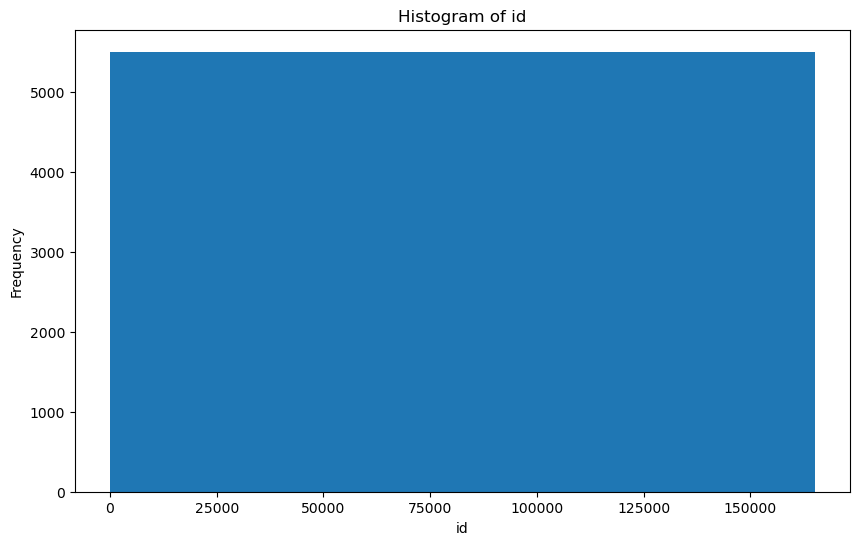

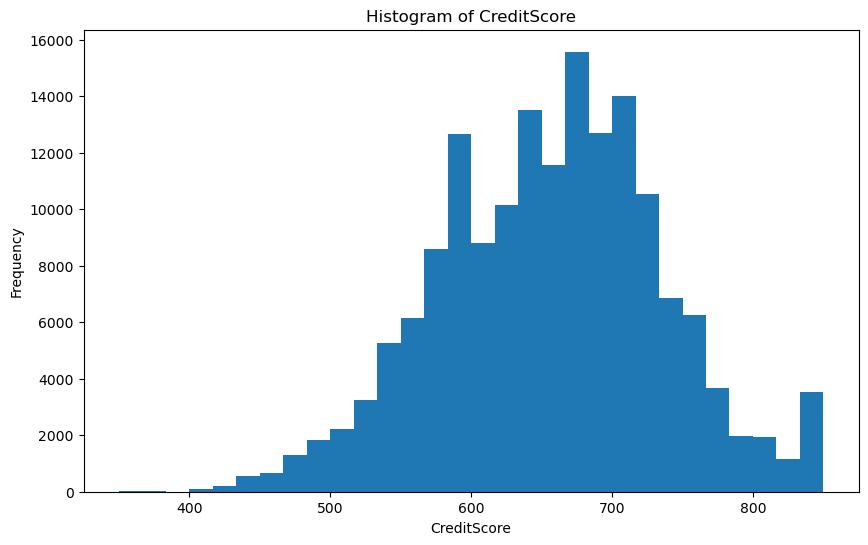

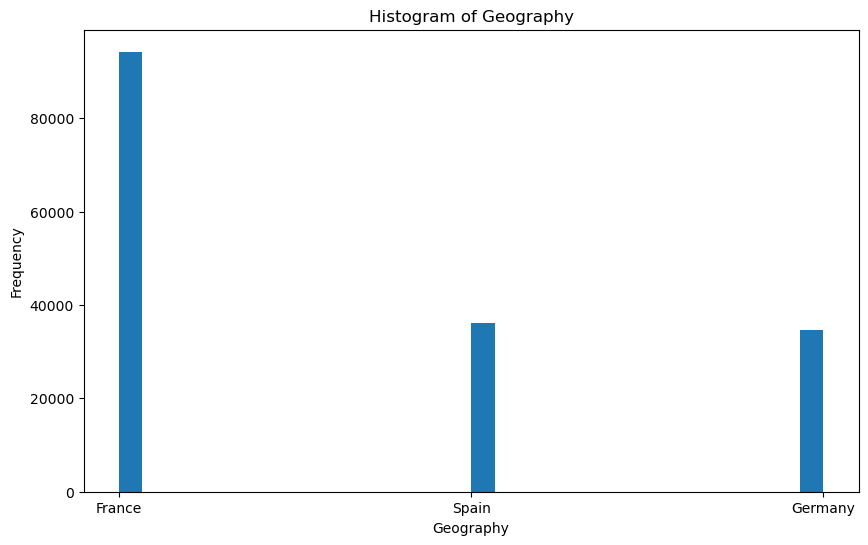

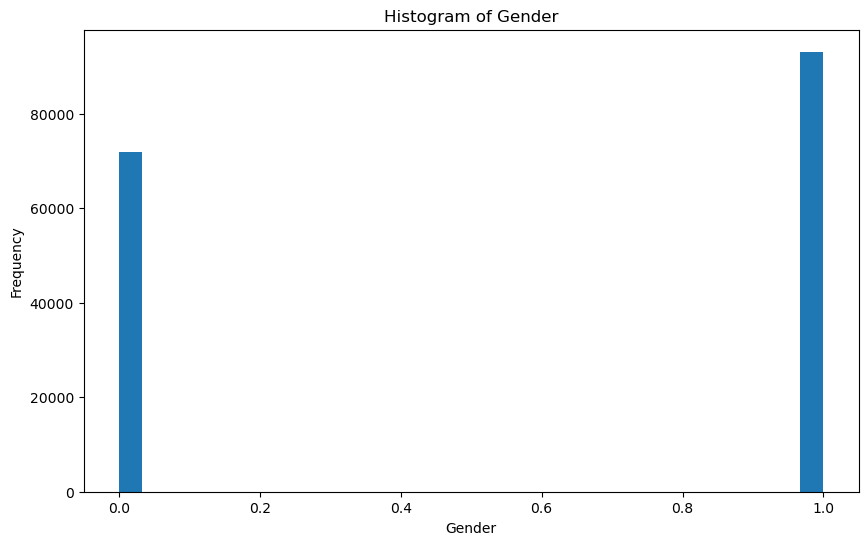

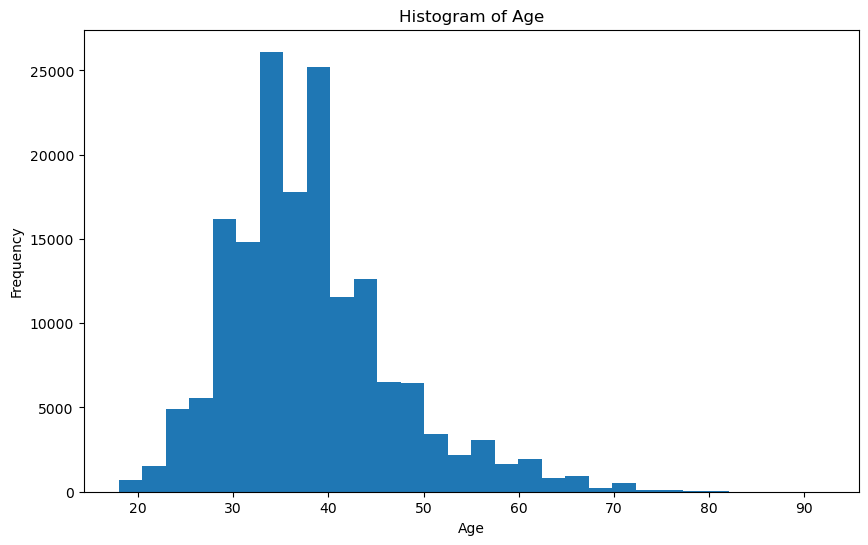

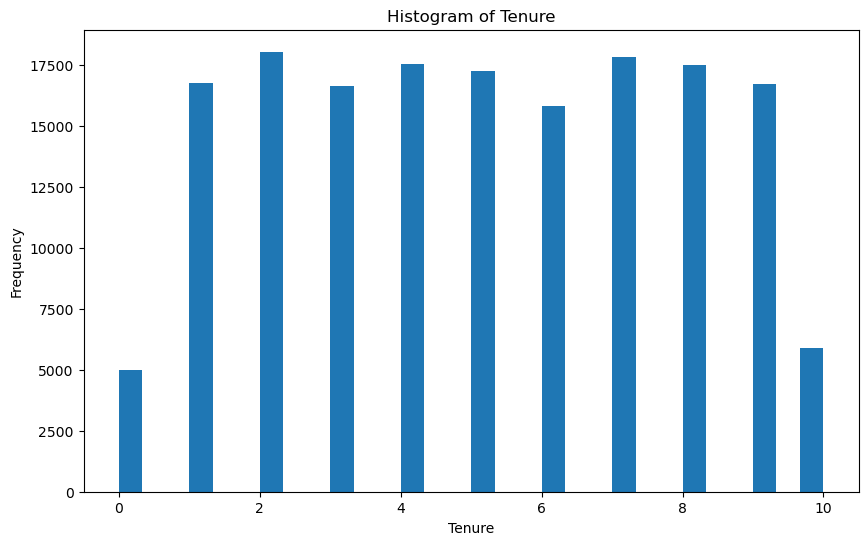

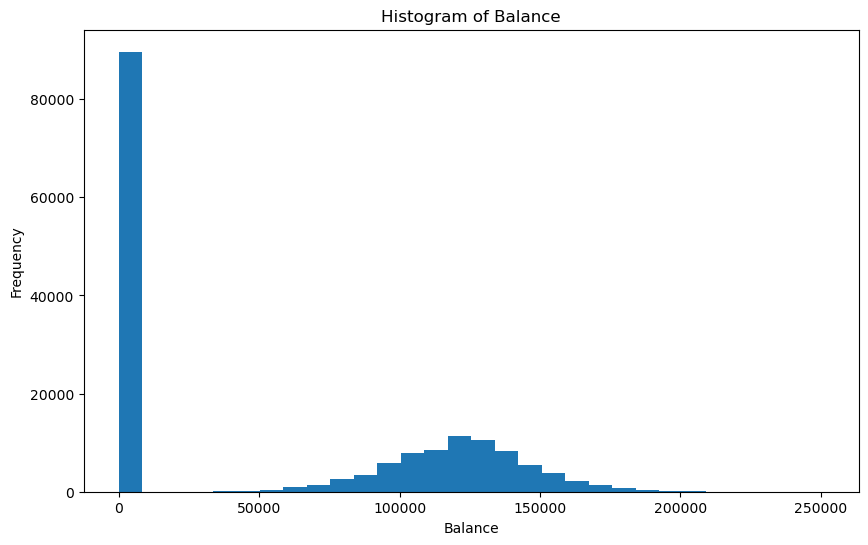

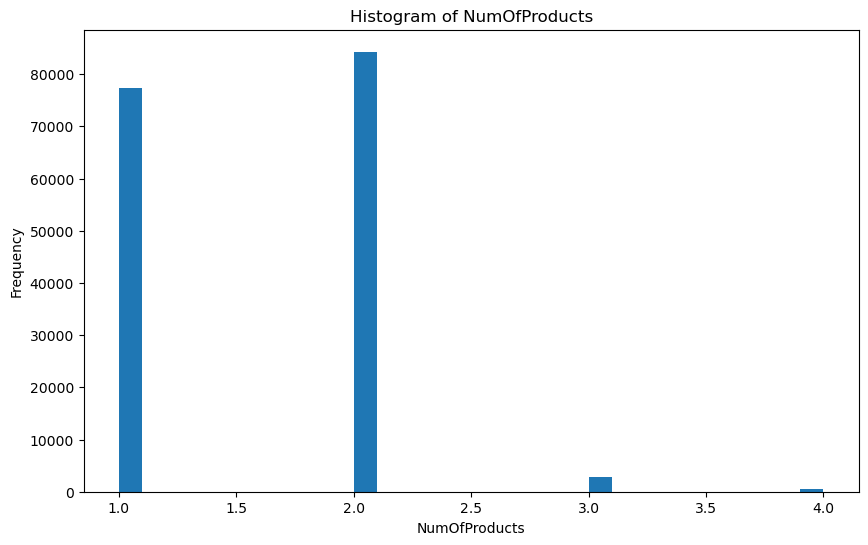

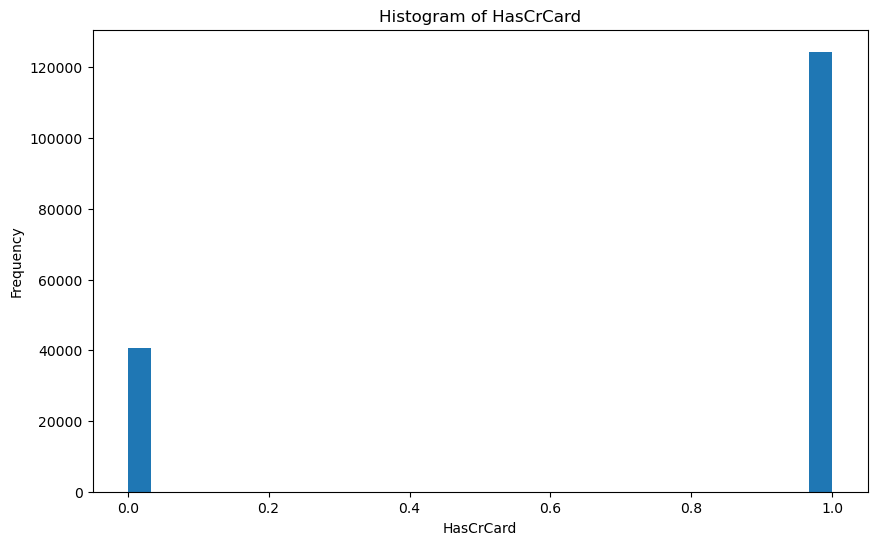

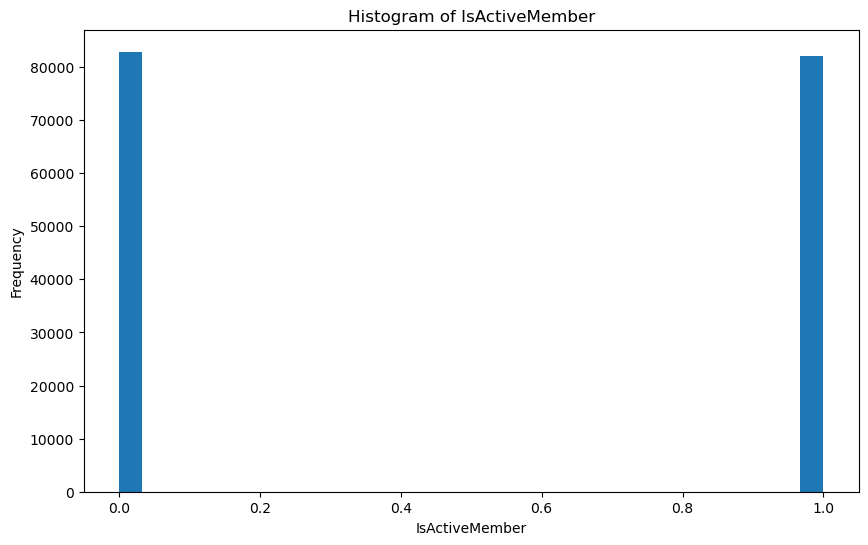

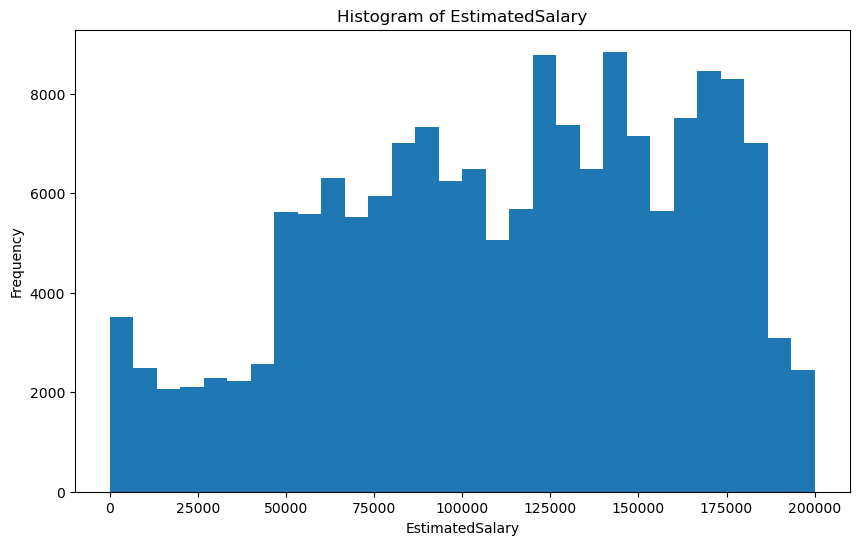

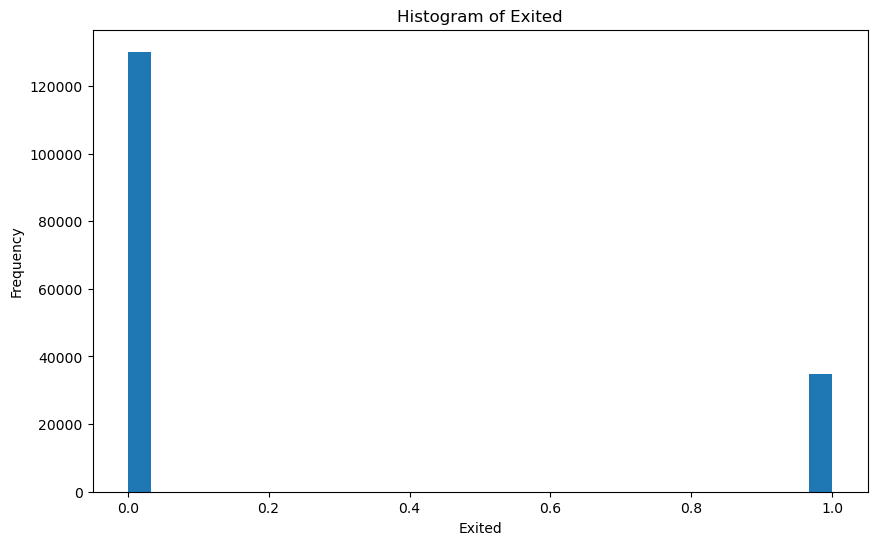

In [17]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py

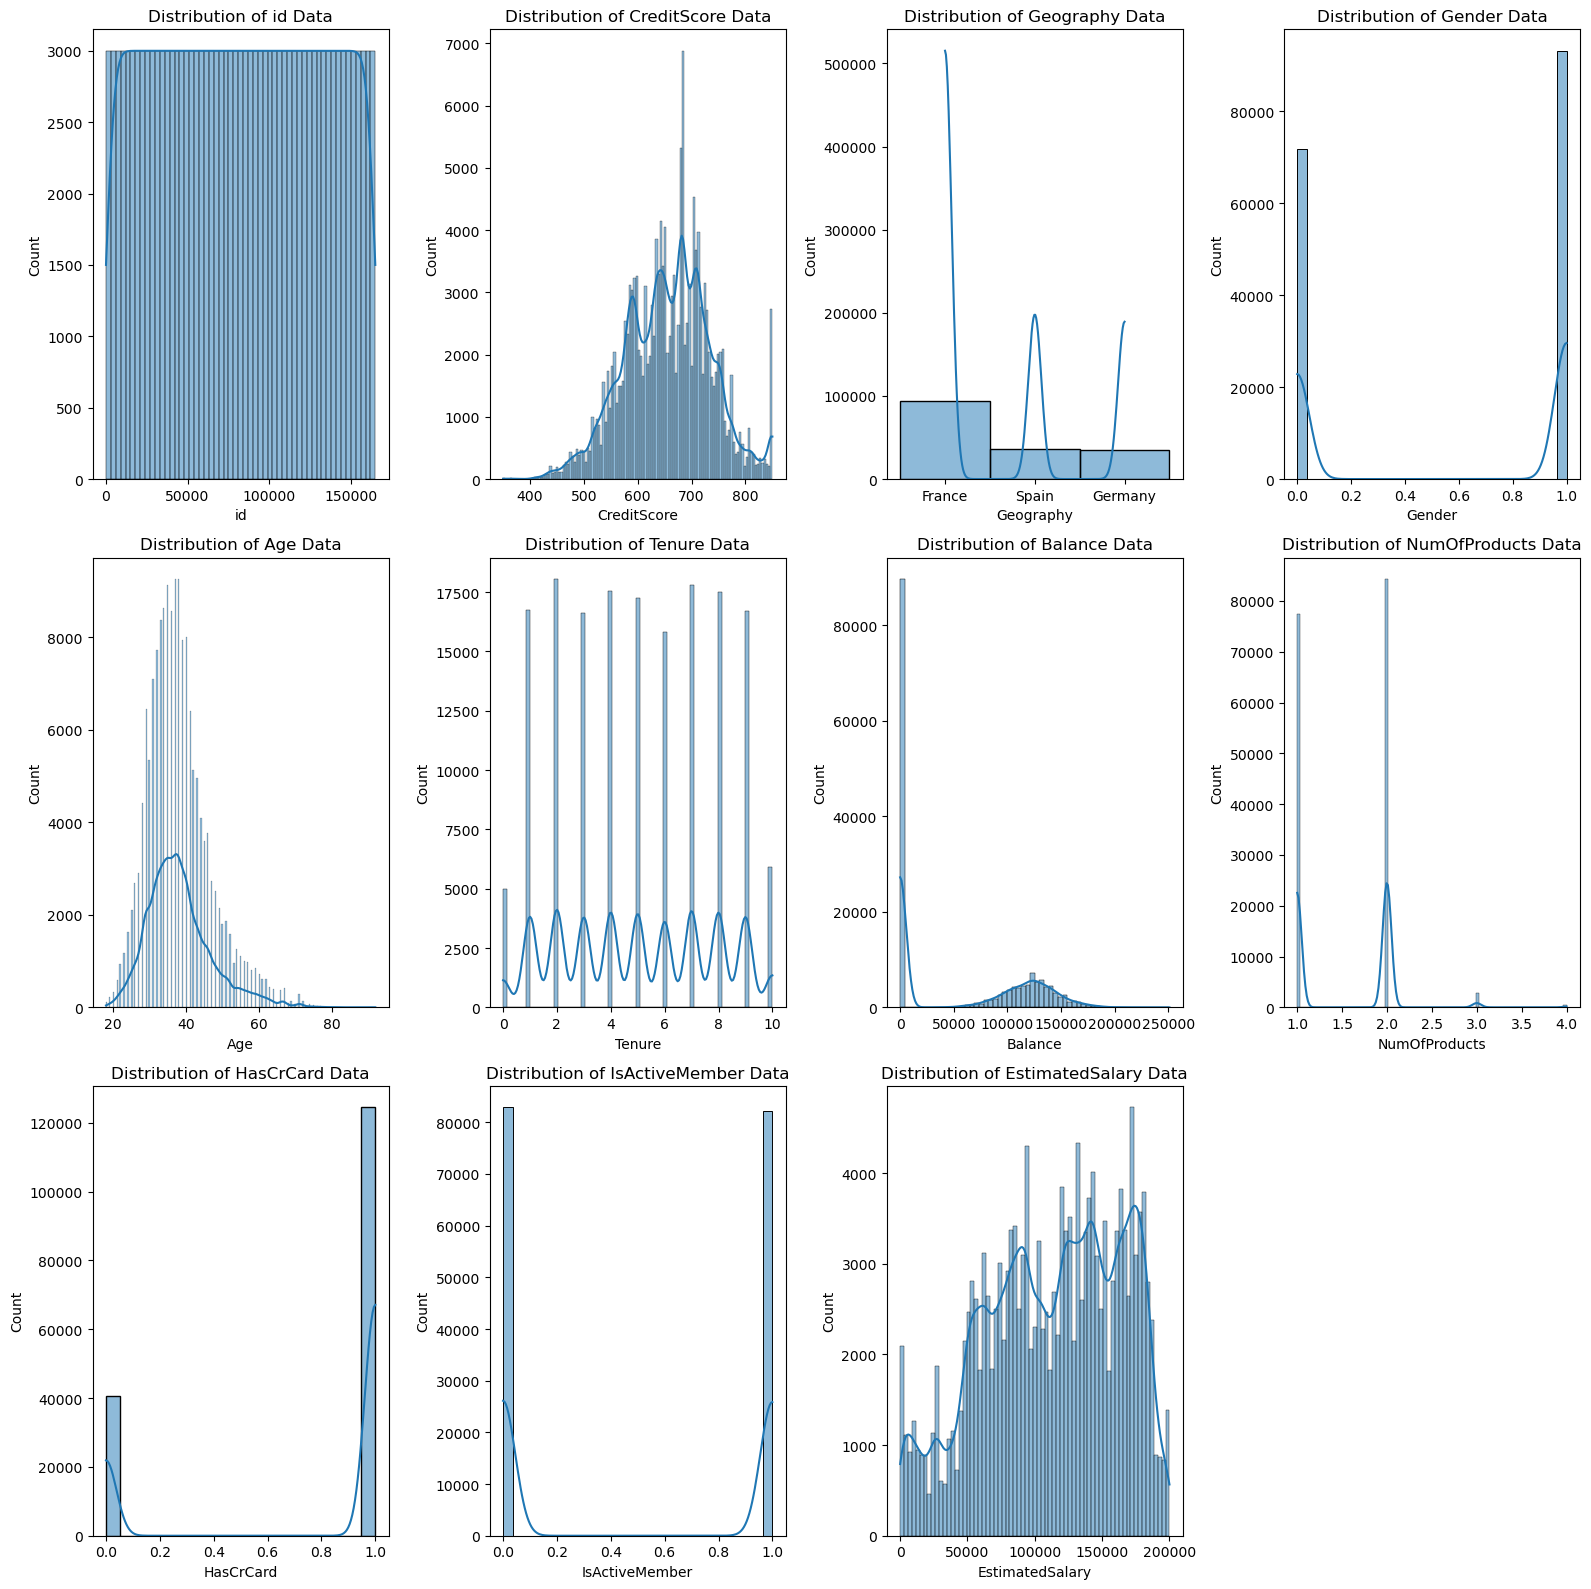

In [18]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns) - 1  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], kde= True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

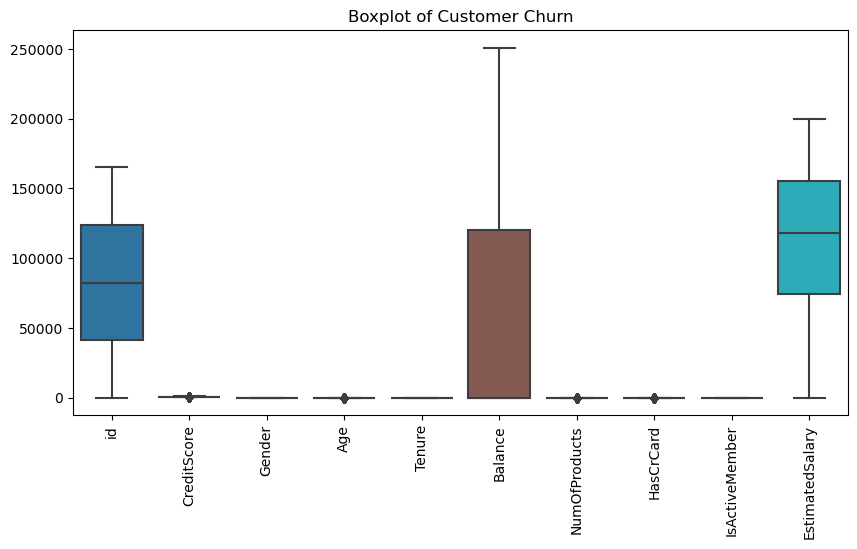

In [19]:
plt.figure(figsize = (10, 5))
sns.boxplot(df[df.columns[:-1]])
plt.title("Boxplot of Customer Churn")
plt.xticks(rotation = 90)
plt.show()